In [1]:
import sqlite3
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import os.path

In [8]:
RT_LIMIT_LOWER = 3000  # RT range in the database
RT_LIMIT_UPPER = 3060
MS1_CE = 10

In [11]:
BASE_NAME = "/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-rt-3000-3600-denoised"
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)

In [13]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
ms1_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where collision_energy == {} and retention_time_secs >= {} and retention_time_secs <= {}".format(MS1_CE, RT_LIMIT_LOWER, RT_LIMIT_UPPER), db_conn)
ms2_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where collision_energy <> {} and retention_time_secs >= {} and retention_time_secs <= {}".format(MS1_CE, RT_LIMIT_LOWER, RT_LIMIT_UPPER), db_conn)
db_conn.close()

In [14]:
ms1_frame_ids = tuple(ms1_frame_properties_df.frame_id)

In [15]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
ms1_raw_points_df = pd.read_sql_query("select intensity from frames where frame_id in {}".format(ms1_frame_ids), db_conn)
db_conn.close()

In [43]:
subset = ms1_raw_points_df[(ms1_raw_points_df.intensity > 2500) & (ms1_raw_points_df.intensity < 4000)]

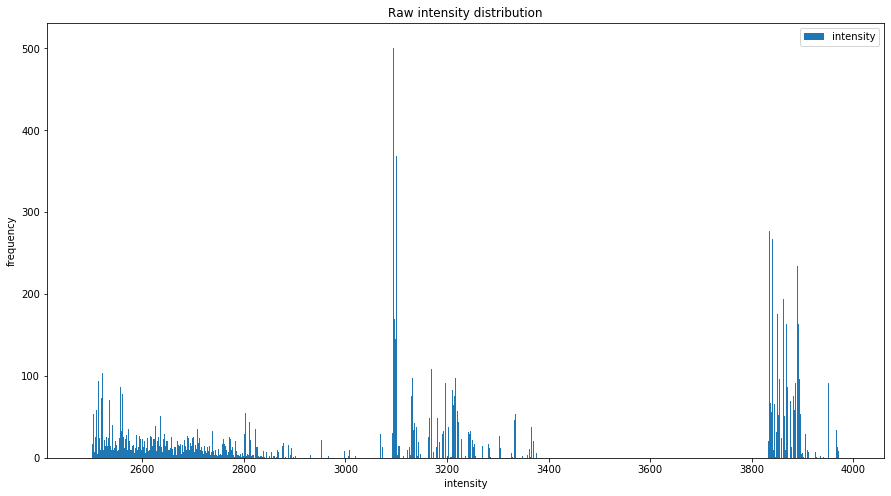

In [44]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Raw intensity distribution')

h_bins = 1000
hist, bins, _ = plt.hist(subset.intensity, bins=h_bins, label='intensity')
plt.legend(loc='best')
plt.xlabel('intensity')
plt.ylabel('frequency')

# plt.xlim([3500,4000])
# plt.ylim([0,3000])

plt.show()